# LightwaveExplorer Data Analyzation & Visualization
This jupyter notebook gives a few data 

In [1]:
#Import Python modules
import LightwaveExplorer as lwe
import numpy as np
#import pandas as pd
#import seaborn as sns
#import ipywidgets as widgets
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
from scipy.signal import hilbert, chirp
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 14

### Loading Simulation Data and Structure Analyzation

In [2]:
# Insert the path to your simulation results here
#SiO2_1mm_xpol = lwe.load("LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")
#SiO2_2mm_xpol = lwe.load("LWE-results/fused-silica-2mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")
#SiO2_1mm_circpol = lwe.load("LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-circpol.zip")
#Vac_1mm_xpol = lwe.load("LWE-results/vacuum-1mm-50nJ-30THz-10000nmbeamwaist-xpol.zip")
#ZnSe_2mm = lwe.load("C:/Users/Admin/Seafile/LightWaveLab/LWE/Max-FROG/ZnSe-2000mm.zip")
#ZnSe_5mm = lwe.load("C:/Users/Admin/Seafile/LightWaveLab/LWE/Max-FROG/ZnSe-5000mm.zip")
#ZnSe_10mm = lwe.load("C:/Users/Admin/Seafile/LightWaveLab/LWE/Max-FROG/ZnSe-10000mm.zip")
#ZnSe_12mm = lwe.load("C:/Users/Admin/Seafile/LightWaveLab/LWE/Max-FROG/ZnSe-12000mm.zip")
#vac = lwe.load("C:/Users/Admin/Seafile/LightWaveLab/LWE/Max-FROG/vacuum.zip")

### Refractive Index

In [ ]:
#first we'll make a wavelength grid to work with
l = np.linspace(0.3,3,1024)

#next we'll need Sellmeier coefficients, these are for barium fluoride, H. H. Li., J. Phys. Chem. Ref. Data 9, 161-289 (1980)
a = lwe.getSellmeierFromRII("https://refractiveindex.info/database/data-nk/main/SiO2/Malitson.yml")
b = lwe.getSellmeierFromRII("https://refractiveindex.info/database/data-nk/main/BaF2/Malitson.yml")

#we can get the refractive index for the wavelengths we put in the grid by calling the sellmeier() function
#from the lightwaveExplorer module, with the equationType set to 0.
n = lwe.sellmeier(l, a, 0)
n2 = lwe.sellmeier(l, b, 0)

#let's make it so we can adjust the resonances of the oscillators and see how it affects the index

fig,ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(l,np.real(n),label="SiO2",color="blue")
ax.plot(l,np.real(n2), label = "BaF2", color = "red")
ax.set_xlabel("Wavelength (" + r'$\mu$' + "m)")
ax.set_ylabel("Refractive index n")
plt.title("Refractive index of different materials")
ax.legend()
plt.savefig("graphs/refractive-index-SiO2-BaF2")
plt.show()

### Create csv-File from LWE Results

In [ ]:
arr = np.array([ZnSe_2mm.timeVector * 1e15, vac.Ext_x[:,257]])
print(arr.shape)
#print()

np.savetxt('myarray.txt', arr)

### On-Axis Electric Field (time domain)

In [ ]:
x = SiO2_1mm_xpol.timeVector * 1e15  # convert to fs
'''
x2 = ZnSe_2mm.timeVector * 1e15
x3 = (ZnSe_2mm.timeVector * 1e15)[200:700]
y1 = SiO2_1mm_xpol.Ext_x[:,87]       # select on-axis column
y2 = SiO2_2mm_xpol.Ext_x[:,87]
y3 = SiO2_1mm_circpol.Ext_x[:,87]
y4 = Vac_1mm_xpol.Ext_x[:,87]
y5 = ZnSe_2mm.Ext_x[:,257]
y6 = ZnSe_5mm.Ext_x[:,257]
y7 = ZnSe_10mm.Ext_x[:,257]
y8 = ZnSe_12mm.Ext_x[:,257]
y9 = vac.Ext_x[:,257]
y10 = ZnSe_12mm.Ext_x[200:700,257]
'''
y = SiO2_1mm_xpol.Ext_x[:,87]       # select on-axis column

#b = np.where(y10<1e7,0,y10)
#print(b)

#print(x2.shape)
#print(ZnSe_12mm.Ext_x)
# FWHM's
#print("FWHM-Vacuum: " + str(lwe.fwhm(x2, y9)))
#print("FWHM-2mm: " + str(lwe.fwhm(x2, y5)))
#print("FWHM-5mm: " + str(lwe.fwhm(x2, y6)))
#print("FWHM-10mm: " + str(lwe.fwhm(x2, y7)))
#print("FWHM-12mm: " + str(lwe.fwhm(x2, y8)))
#print(lwe.fwhm(x, y2))
#print(lwe.fwhm(x, y4))

plt.figure(figsize=(16, 8))
plt.plot(x, y, 'blue', label='Vacuum') #, FWHM=4.39fs
#plt.plot(x, y1, 'red', label='1mm SiO2') #, FWHM=7.56fs
#plt.plot(x, y2, 'blue', label='2mm SiO2') #, FWHM=19.81fs
plt.xlabel('Time [fs]')
plt.ylabel('Ex [GV/m]')
plt.title('On-Axis Electric Field in x-Polarization')
plt.legend()
#plt.savefig('graphs/Vacuum-on-axis-electric-field-test')
plt.show()

In [ ]:
phase = np.linspace(0, np.pi, num=5)
print(np.angle(1j)/np.pi)

### On-Axis Electric Field (time domain) + Pulse Envelope + FWHM + Phase + Instantaneous Frequency

In [ ]:
input_pulse = lwe.load("LWE-results/exercise-input-pulse-100mJ-30THz-025fs-temporal-step.zip")
output_pulse = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step.zip")

x = output_pulse.timeVector * 1e15  # convert to fs
y = output_pulse.Ext_x[:,255]
#print(SiO2_1mm_xpol.Ext_x.shape)
fs = len(x)

# Compute the analytic signal, using the Hilbert transform. (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html)
# Zeroes out the negative half of the frequency spectrum, which yields a complex signal (only one exponential left)
analytic_signal = sp.signal.hilbert(y)
amplitude_envelope = np.abs(analytic_signal)
# np.angle returns angle of complex number in complex plane
# np.unwrap unwraps array by transforming deltas to 2*pi complement values
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# phase blanking
instantaneous_phase_cleaned = np.where(amplitude_envelope < 0.1 * np.max(amplitude_envelope), 0, instantaneous_phase)
instantaneous_phase_cleaned[instantaneous_phase_cleaned == 0] = np.nan
# np.diff calculates the n-th discrete difference along the given axis: out[i] = a[i+1] - a[i]
# inst freq is derivative of phase, therefore np.diff can be used as derivative
instantaneous_frequency = (np.diff(instantaneous_phase_cleaned) / (2.0*np.pi)  * 1e15)
#instantaneous_frequency_cleaned = np.where(amplitude_envelope[1:] < 0.1 * np.max(amplitude_envelope), 0, instantaneous_frequency) # 
#instantaneous_frequency_cleaned[instantaneous_frequency_cleaned == 0] = np.nan

print("FWHM-Vacuum: " + str(lwe.fwhm(x, amplitude_envelope)))

#Plot with two y-axis (for E-field, instantaneous frequency)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, analytic_signal, 'red')
ax2.plot(x[:(len(x)-1)], instantaneous_frequency, 'blue')

ax1.set_xlabel('Time [fs]')
ax1.set_ylabel('signal', color='r')
ax2.set_ylabel('instantaneous frequency', color='b')

plt.show()

### On-Axis Electric Field (frequency domain) + FWHM

In [ ]:
x = SiO2_1mm_xpol.frequencyVectorSpectrum / 1e12 # convert to THz
y1 = SiO2_1mm_xpol.spectrumTotal
y2 = Vac_1mm_xpol.spectrumTotal
#data = lwe.load("C:\Users\Admin\Seafile\LightWaveLab\LWE\Max-FROG")
#data2 = lwe.load("LWE-results/vacuum-1mm-50nJ-30THz-10000nmbeamwaist-circpol.zip")
#x = data.frequencyVectorSpectrum /1e12
#y1 = data.spectrum_x
#y2 = data2.spectrum_x
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
#print(y1.shape)

print("FWHM-1mm-SiO2: " + str(lwe.fwhm(x, y1)))

fig, ax1 = plt.subplots(figsize=(10,8))

# Linear
color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Sx linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')
#ax1.plot(x, amplitude_envelope, color='orange', label='1mm Fused Silica linear envelope')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlim((0,1000))
plt.legend(loc=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Log
color2 = 'tab:blue'
#color3 = 'tab:lightblue'
ax2.set_ylabel('Sx log [J/THz]', color=color2)
ax2.set_yscale('log')
ax2.plot(x, y, color='#0406b0', label='1mm Fused Silica log')
ax2.plot(x, y2, color='#42bff5', label='1mm Vacuum log')
ax2.tick_params(axis='y', labelcolor=color2)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

#plt.legend()#plt.legend(ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')+ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log'), [ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear').get_label(), ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log').get_label()])
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Energy Spectrum in x-Polarization after 1mm of Fused Silica')
#plt.savefig('graphs/energy-spectrum-after-1mm-fused-silica')
plt.show()

## Exercise

### Fused Silica Exercise

A 10-fs pulse at a central wavelength of 1 μm and a chirp-free Gaussian temporal profile (linear polarization, 100 kHz laser repetition rate, 10 W average power) is focused on a 1 mm thick fused silica plate, such that the smallest focus is in the center of the plate and has a diameter of 0.6 mm.

For a 10-fs pulse at a central wavelength of 1 μm and a chirp-free Gaussian temporal profile , the pulse bandwidth can be calculated via the time bandwidth product (0.441): 147 nm equaling 44.3 THz

Pulse energy = average power / rep rate = 10 W / 100 kHz = 0.0001 J = 100 mcJ

- Is the linear polarization direction with respect to the crystal material orientation within the plate relevant in this scenario (i.e. does it change the result more than the same change in the polarization direction of the output)? Why, why not? How about circular polarization? Why, why not?

Fused Silica is optically isotropic, which means it has no birefringence and has the same refractive index for all polarizations.

- Pulse duration before and after plate:
FWHM-Vacuum: approx. 12 fs
FWHM-1mm-SiO2: approx. 34 fs

### Check for Convergence
Without absorption effects simulated, the input- and output energies should not deviate more than expected from numerical effects (>~0.2 %)

In [ ]:
# Check for convergence through input- and output energy comparison
input_pulse = lwe.load("LWE-results/exercise-input-pulse-100mJ-30THz-025fs-temporal-step.zip")
output_pulse = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step.zip")

x = input_pulse.timeVector * 1e15  # convert to fs
y1 = input_pulse.Ext_x[:,255]
y2 = output_pulse.Ext_x[:,255]

# Compute the analytic signal, using the Hilbert transform. (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html)
# Zeroes out the negative half of the frequency spectrum, which yields a complex signal (only one exponential left)
analytic_signal1 = sp.signal.hilbert(y1)
amplitude_envelope1 = np.abs(analytic_signal1)
analytic_signal2 = sp.signal.hilbert(y2)
amplitude_envelope2 = np.abs(analytic_signal2)

# Calculate area under pulse envelope using Trapezoid Rule
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area

'''
def integrate(x, y):
   sm = 0
   for i in range(1, len(x)):
       h = x[i] - x[i-1]
       sm += h * (y[i-1] + y[i]) / 2
   return sm
'''

print(integrate(x, amplitude_envelope1))
print(integrate(x, amplitude_envelope2))
print('Ratio of input- and output pulse energy: ', (integrate(x, amplitude_envelope1) / integrate(x, amplitude_envelope2)) * 100, ' %')

- How does the pulse duration change?<br>
FWHM-Vacuum: 11.964595036807793<br>
FWHM-1mm-SiO2: 34.39025795057569

- What is the resulting bandwidth (FWHM spectral intensity)?<br>
FWHM-Vacuum: 52.19528498629609 fs<br>
FWHM-1mm-SiO2: 225.2253231264810 fs

- What is the main physical principle behind the change and is it a linear or nonlinear phenomenon?<br>
Self-phase-modulation based on the second order electrooptical effect / Kerr effect, which is a nonlinear effect based on the E^2 or the intensit

### Pulse before and after SiO2 plate (time domain)

In [ ]:
# Exercise pulses
input_pulse = lwe.load("LWE-results/exercise-input-pulse-100mJ-30THz-025fs-temporal-step.zip")
output_pulse = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step.zip")

x = input_pulse.timeVector * 1e15  # convert to fs
y1 = input_pulse.Ext_x[:,255]
y2 = output_pulse.Ext_x[:,255]

# Compute the analytic signal, using the Hilbert transform. (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html)
# Zeroes out the negative half of the frequency spectrum, which yields a complex signal (only one exponential left)
analytic_signal1 = sp.signal.hilbert(y1)
amplitude_envelope1 = np.abs(analytic_signal1)
analytic_signal2 = sp.signal.hilbert(y2)
amplitude_envelope2 = np.abs(analytic_signal2)
'''
# np.angle returns angle of complex number in complex plane
# np.unwrap unwraps array by transforming deltas to 2*pi complement values
instantaneous_phase = np.unwrap(np.angle(analytic_signal1))
# phase blanking
instantaneous_phase_cleaned = np.where(amplitude_envelope < 0.1 * np.max(amplitude_envelope), 0, instantaneous_phase)
instantaneous_phase_cleaned[instantaneous_phase_cleaned == 0] = np.nan
# np.diff calculates the n-th discrete difference along the given axis: out[i] = a[i+1] - a[i]
# inst freq is derivative of phase, therefore np.diff can be used as derivative
instantaneous_frequency = (np.diff(instantaneous_phase_cleaned) / (2.0*np.pi)  * 1e15)
#instantaneous_frequency_cleaned = np.where(amplitude_envelope[1:] < 0.1 * np.max(amplitude_envelope), 0, instantaneous_frequency) # 
#instantaneous_frequency_cleaned[instantaneous_frequency_cleaned == 0] = np.nan
'''

print("FWHM-Vacuum: " + str(lwe.fwhm(x, amplitude_envelope1)))
print("FWHM-1mm-SiO2: " + str(lwe.fwhm(x, amplitude_envelope2)))

#Plot with two y-axis (for E-field, instantaneous frequency)
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(x, y1, 'red', label='input pulse')
ax1.plot(x, y2, 'green', label = '1mm-SiO2')
#ax2.plot(x[:(len(x)-1)], instantaneous_frequency, 'blue')

ax1.set_xlabel('Time [fs]')
ax1.set_ylabel('signal') # color='r'
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
#ax2.set_ylabel('instantaneous frequency', color='b')

plt.show()

#print(y.shape)

#sp.integrate.quad

### Pulse before and after SiO2 plate (frequency domain)

In [ ]:
input_pulse = lwe.load("LWE-results/exercise-input-pulse-100mJ-30THz-025fs-temporal-step.zip")
output_pulse = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step.zip")

x = input_pulse.frequencyVectorSpectrum / 1e12  # convert to fs
y1 = input_pulse.spectrumTotal
y2 = output_pulse.spectrumTotal

print("FWHM-Vacuum: " + str(lwe.fwhm(x, y1)))
print("FWHM-1mm-SiO2: " + str(lwe.fwhm(x, y2)))

fig, ax1 = plt.subplots(figsize=(10,8))

# Linear
color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Sx linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')
#ax1.plot(x, amplitude_envelope, color='orange', label='1mm Fused Silica linear envelope')
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.set_xlim((0,1000))
plt.legend(loc=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Log
color2 = 'tab:blue'
#color3 = 'tab:lightblue'
ax2.set_ylabel('Sx log [J/THz]', color=color2)
ax2.set_yscale('log')
ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log')
ax2.plot(x, y2, color='#42bff5', label='1mm Vacuum log')
ax2.tick_params(axis='y', labelcolor=color2)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

#plt.legend()#plt.legend(ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')+ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log'), [ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear').get_label(), ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log').get_label()])
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Energy Spectrum in x-Polarization after 1mm of Fused Silica')
#plt.savefig('graphs/energy-spectrum-after-1mm-fused-silica')
plt.show()

### Evolution of spectrum and pulse duration with pulse energy

Load batch simulation results:

In [3]:
SiO2_batch_pulse_energy = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step-batch-pulse-energy-50mcJto200mcJ-11steps.zip")

Plot spectral evolution:

In [ ]:
#print(SiO2_batch_thickness.Ext_x.shape)
x = SiO2_batch_pulse_energy.frequencyVectorSpectrum / 1e12 # convert to Thz
#print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch_pulse_energy.batchVector * 1000 # convert to microns
print(y)
print(y.shape)
#print(x)
z = SiO2_batch_pulse_energy.spectrumTotal
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
#print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Pulse Energy [" + r'$\mu$' + "m]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Pulse Energy in Fused Silica')
plt.colorbar()
plt.savefig("graphs/exercise-spectral-evolution-with-pulse-energy-in-fused-silica")
plt.close()

Plot pulse envelope evolution:

In [80]:
x = SiO2_batch_pulse_energy.timeVector * 1e15 # convert to fs
y = SiO2_batch_pulse_energy.batchVector * 1000 # convert to microns
z = SiO2_batch_pulse_energy.Ext_x[:,255,:] # select x = 0 field data (on z-axis)
z_transposed = np.transpose(z)  # fix arrangement of field data array

# Apply Hilbert transform along every row of transposed z array and get envelope through abs -> pulse envelope for each batsched depth
amplitude_envelope = np.abs(np.apply_along_axis(sp.signal.hilbert, 1, z_transposed))

X,Y = np.meshgrid(x,y)
Z = amplitude_envelope

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma')#, norm=matplotlib.colors.LogNorm())
plt.xlabel("Propagation depth [" + r'$\mu$' + "m]")
plt.ylabel("|Ex| [GV/m]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Pulse Envelope Evolution with Pulse Energy in Fused Silica')
plt.colorbar()
plt.savefig("graphs/exercise-pulse-envelope-evolution-with-pulse-energy-in-fused-silica")
plt.close()

Plot pulse FWHM evolution:

In [ ]:
x = SiO2_batch_pulse_energy.timeVector * 1e15 # convert to fs
y = SiO2_batch_pulse_energy.batchVector * 1000 # convert to microns
z = SiO2_batch_pulse_energy.Ext_x[:,255,:] # select x = 0 field data (on z-axis)
z_transposed = np.transpose(z)  # fix arrangement of field data array

# Apply Hilbert transform along every row of transposed z array and get envelope through abs -> pulse envelope for each batsched depth
amplitude_envelope = np.abs(np.apply_along_axis(sp.signal.hilbert, 1, z_transposed))

# Calculate FWHMs for each batched propagation depth (one for each row of amplitude_envelope)
fwhms = np.zeros(len(y))
batch_vector_iterator = np.linspace(0, len(y) -1, len(y), dtype=int)
for i in batch_vector_iterator:
    fwhms[i] = (lwe.fwhm(x, amplitude_envelope[i]))
print(fwhms)

plt.figure(figsize=(10,5))
plt.plot(y, fwhms)#, norm=matplotlib.colors.LogNorm())
plt.xlabel("Propagation depth [" + r'$\mu$' + "m]")
plt.ylabel("FWHM [fs]")
plt.title('Pulse Envelope Evolution with Pulse Energy in Fused Silica')
plt.savefig("graphs/exercise-pulse-fwhm-evolution-with-pulse-energy-in-fused-silica")
plt.close()

In [ ]:
SiO2_batch_pulse_energy = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step-batch-pulse-energy-50to200mcJ-11steps.zip")
#print(SiO2_batch_thickness.Ext_x.shape)
x = SiO2_batch_pulse_energy.frequencyVectorSpectrum / 1e12 # convert to THz
print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch_pulse_energy.batchVector * 1e9  # convert to nJ
print(y)
print(y.shape)
#print(x)
z = SiO2_batch_pulse_energy.spectrumTotal
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
#print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Pulse Energy [nJ]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Pulse Energy')
plt.colorbar()
plt.savefig("graphs/spectral-evolution-with-puls-energy-bigbatch")
plt.close()

### Evolution of spectrum and pulse duration with propagation depth

Load batch simulation results:

In [ ]:
SiO2_batch_thickness = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step-batch-plate-thickness-0to1mm-11steps.zip")

Plot spectral evolution:

In [ ]:
#print(SiO2_batch_thickness.Ext_x.shape)
x = SiO2_batch_thickness.frequencyVectorSpectrum / 1e12 # convert to Thz
#print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch_thickness.batchVector * 1000 # convert to microns
print(y)
print(y.shape)
#print(x)
z = SiO2_batch_thickness.spectrumTotal
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
#print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Propagation depth [" + r'$\mu$' + "m]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Propagation depth in Fused Silica')
plt.colorbar()
plt.savefig("graphs/exercise-spectral-evolution-with-propagation-depth-in-fused-silica")
plt.close()

Plot pulse envelope evolution:

In [65]:
x = SiO2_batch_thickness.timeVector * 1e15 # convert to fs
y = SiO2_batch_thickness.batchVector * 1000 # convert to microns
z = SiO2_batch_thickness.Ext_x[:,255,:] # select x = 0 field data (on z-axis)
z_transposed = np.transpose(z)  # fix arrangement of field data array

# Apply Hilbert transform along every row of transposed z array and get envelope through abs -> pulse envelope for each batsched depth
amplitude_envelope = np.abs(np.apply_along_axis(sp.signal.hilbert, 1, z_transposed))

X,Y = np.meshgrid(x,y)
Z = amplitude_envelope

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma')#, norm=matplotlib.colors.LogNorm())
plt.xlabel("Propagation depth [" + r'$\mu$' + "m]")
plt.ylabel("|Ex| [GV/m]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Pulse Envelope Evolution with Propagation depth in Fused Silica')
plt.colorbar()
plt.savefig("graphs/exercise-pulse-envelope-evolution-with-propagation-depth-in-fused-silica")
plt.close()

Plot pulse FWHM evolution:

In [ ]:
x = SiO2_batch_thickness.timeVector * 1e15 # convert to fs
y = SiO2_batch_thickness.batchVector * 1000 # convert to microns
z = SiO2_batch_thickness.Ext_x[:,255,:] # select x = 0 field data (on z-axis)
z_transposed = np.transpose(z)  # fix arrangement of field data array

# Apply Hilbert transform along every row of transposed z array and get envelope through abs -> pulse envelope for each batsched depth
amplitude_envelope = np.abs(np.apply_along_axis(sp.signal.hilbert, 1, z_transposed))

# Calculate FWHMs for each batched propagation depth (one for each row of amplitude_envelope)
fwhms = np.zeros(len(y))
batch_vector_iterator = np.linspace(0, len(y) -1, len(y), dtype=int)
for i in batch_vector_iterator:
    fwhms[i] = (lwe.fwhm(x, amplitude_envelope[i]))
print(fwhms)

plt.figure(figsize=(10,5))
plt.plot(y, fwhms)#, norm=matplotlib.colors.LogNorm())
plt.xlabel("Propagation depth [" + r'$\mu$' + "m]")
plt.ylabel("FWHM [fs]")
plt.title('Pulse Envelope Evolution with Propagation depth in Fused Silica')
plt.savefig("graphs/exercise-pulse-fwhm-evolution-with-propagation-depth-in-fused-silica")
plt.close()

### Phase Matching
- Ensuring proper phase relationship between the interacting waves is maintained along the propagation direction
- Only if that condition is fulfilled, amplitude contributions from different locations to the product wave are all in phase at the end of the nonlinear crystal.<br>
Birefringent Phase Matching:<br>
- Type I Phase Matching: Both input photons have the same polarization, and the generated second harmonic wave has a perpendicular polarization.
- Type II Phase Matching: The input photons have perpendicular polarizations, and the generated second harmonic wave may have a polarization that is either the same as one of the input photons or a combination of the two, depending on the crystal orientation and other parameters.
- E.g. Type 1 phase matching (incident beams have same polarization -> given for single incident beam) of SHG:<br>
    phase mismatch is given by Δkm = k2 - 2 * k1<br>
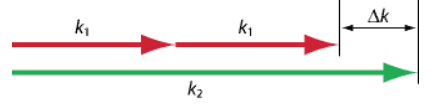<br>
- without chromatic dispersion, k2 = 2 * k1 would hold
-> can be solved by using a birefringent crystal, as in Type 1 phase matching fundamental and SH are perpendicularly poplarized and thus travel at different speeds<br>
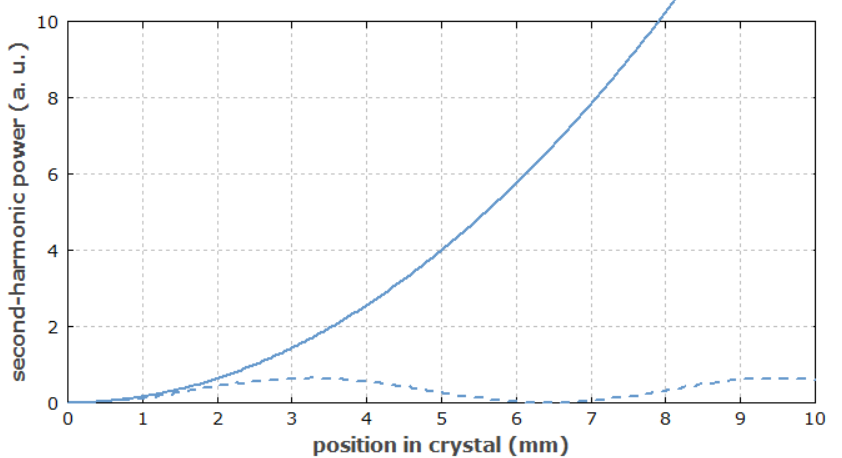<br>
Solid curve: phase-matched case, with the power growing in proportion to the square of the propagation distance. Dashed curve: non phase-matched case, with the second-harmonic power oscillating between zero and a small value.
- In a frequency doubler, the direction of energy transfer is governed by the complex phase of the term (E1)^2 * (E2)^*. For the phase mistmatch to be zero, this terms phase must remain constant along the propagation direction.
- Even after phase matching, there is a certain group velocity mismatch, which limits the interaction length for pulses and (for a given interaction length) the spectral range (called phase-matching bandwidth)

## Tangor
Rep.-rate: 115 kHz<br>
Output-power: 22 W<br>
Beam-profile (1/e^2): 4538.83 microns & 5128.09 microns<br>
<br>
Spectral Domain:<br>
Central wavelength: 1030.7 nm = 290.863 THz<br>
Spectral bandwidth: appox. 90 nm = 25.4 THz bzw. 40 nm = 11.3 THz (very rough approx, see image below)<br>
Pulse GDD: 86 fs^2<br>
Pulse TOD: 736 fs^3<br>
Pulse FOD: -46.735 fs^4<br>
<br>
Time Domain: <br>
Pulse width: 20.63 fs<br>
<br>
Calculation with https://www.lasercalculator.com/pulse-train-calculator/ :<br>
Pulse energy: 191 mcJ<br>
Peak Power: appox. 8.5 GW (sech^2), 9 GW (Gauss)<br>
Pulse separation: 8.7 mcs<br>
Average intensity: 120 W/cm^2<br>
Peak intensity: 52.2 GW/cm^2<br>

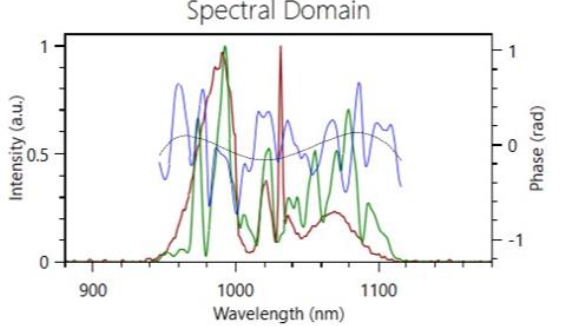

In [ ]:
# Calculate Peak Intensity without focusing

Ipeak = 191e-6 / (np.pi * (0.4830 / 2)**2 * 20e-15) # unit W/cm^2
Ipeak_GW = Ipeak / 1e9
Ppeak = 0.9 * 191e-6 / 20e-15
Ipeak2 = Ppeak /(np.pi * (0.4830/2)**2)
Ipeak2_GW = Ipeak2 / 1e9
Ppeak_GW = Ppeak / 1e9
print(Ipeak2_GW)
print(Ipeak_GW)
print(Ppeak_GW)

omega0= 1030e-9 * 200e-3 / ( np.pi * 48e-3)
print(omega0)
I = 2 * 22 /(np.pi * omega0**2)
print(I)

### Time Domain

In [ ]:
# Tangor pulses
input_pulse = lwe.load("LWE-results/Tangor-input.zip")
output_pulse = lwe.load("LWE-results/Tangor-1mm-fused-silica-updated-data.zip")
output_pulse2 = lwe.load("LWE-results/test2.zip")

x = input_pulse.timeVector * 1e15  # convert to fs
y1 = input_pulse.Ext_x[:,255]
y2 = output_pulse2.Ext_x[:,255]

# Compute the analytic signal, using the Hilbert transform. (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html)
# Zeroes out the negative half of the frequency spectrum, which yields a complex signal (only one exponential left)
analytic_signal1 = sp.signal.hilbert(y1)
amplitude_envelope1 = np.abs(analytic_signal1)
analytic_signal2 = sp.signal.hilbert(y2)
amplitude_envelope2 = np.abs(analytic_signal2)

print("FWHM-Input: " + str(lwe.fwhm(x, amplitude_envelope1)))
print("FWHM-1mm-SiO2: " + str(lwe.fwhm(x, amplitude_envelope2)))

#Plot with two y-axis (for E-field, instantaneous frequency)
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(x, y1, 'red', label='input pulse')
ax1.plot(x, y2, 'green', label = '1mm-SiO2')
#ax2.plot(x[:(len(x)-1)], instantaneous_frequency, 'blue')

ax1.set_xlabel('Time [fs]')
ax1.set_ylabel('signal') # color='r'
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
#ax2.set_ylabel('instantaneous frequency', color='b')

plt.show()

#print(y.shape)

#sp.integrate.quad

### Frequency Domain

In [ ]:
# Tangor pulses
input_pulse = lwe.load("LWE-results/Tangor-input.zip")
output_pulse = lwe.load("LWE-results/Tangor-3mm-fused-silica-updated-data.zip")

x = input_pulse.frequencyVectorSpectrum / 1e12  # convert to fs
y1 = input_pulse.spectrumTotal
y2 = output_pulse.spectrumTotal

print("FWHM-Vacuum: " + str(lwe.fwhm(x, y1)))
print("FWHM-3mm-SiO2: " + str(lwe.fwhm(x, y2)))

fig, ax1 = plt.subplots(figsize=(10,8))

# Linear
color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Sx linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')
#ax1.plot(x, amplitude_envelope, color='orange', label='1mm Fused Silica linear envelope')
ax1.tick_params(axis='y', labelcolor=color1)
#ax1.set_xlim((0,1000))
plt.legend(loc=1)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Log
color2 = 'tab:blue'
#color3 = 'tab:lightblue'
ax2.set_ylabel('Sx log [J/THz]', color=color2)
ax2.set_yscale('log')
ax2.plot(x, y1, color='#0406b0', label='3mm Vacuum log')
ax2.plot(x, y2, color='#42bff5', label='3mm Fused Silica log')
ax2.tick_params(axis='y', labelcolor=color2)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

#plt.legend()#plt.legend(ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear')+ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log'), [ax1.plot(x, y1, color=color1, label='1mm Fused Silica linear').get_label(), ax2.plot(x, y1, color='#0406b0', label='1mm Fused Silica log').get_label()])
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Energy Spectrum after 3mm of Fused Silica') #in x-Polarization
plt.savefig('graphs/energy-spectrum-after-1mm-fused-silica-updated-data')
plt.show()

# Old Stuff ----------------------------------------------------

### K-space representation (alpha)

In [ ]:
from scipy.fft import fft2

y = SiO2_1mm_xpol.frequencyVector / 1e12 # convert to THz
x = SiO2_1mm_xpol.spaceVector
print(x.shape)
z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
z_norma = lwe.norma(z)
z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma_r', norm=matplotlib.colors.LogNorm())
plt.xlabel("Frequency [THz]")
plt.ylabel("Position [" + r'$\mu$' + "m]")
plt.xlim((-2000,0))
plt.savefig("graphs/output")
plt.colorbar()
plt.show()



### Electric Field Grid

In [ ]:
result_electric_field_grid = lwe.load('LWE-results/fused-silica-1mm-50nJ-30THz-10000nmbeamwaist-circpol-electric-field-grid.zip')

y = result_electric_field_grid.timeVector * 1e15 # convert to fs
x = result_electric_field_grid.spaceVector * 1e6
print(x.shape)
z = result_electric_field_grid.Ext_x
#z_norma = lwe.norma(z)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z

# custom colormap that diverges from black in the middle
hue_neg, hue_pos = 260, 40
custom_cmap = sns.diverging_palette(hue_neg, hue_pos, center="dark", as_cmap=True)

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="gouraud", cmap=custom_cmap) #norm=matplotlib.colors.LogNorm()
plt.xlabel("Time [fs]")
plt.ylabel("Position [" + r'$\mu$' + "m]")
#plt.xlim((-2000,0))
plt.title('Electric Field Grid Ex(x, y=0, t)')
clb = plt.colorbar()
clb.ax.set_title('Ex [GV/m]')
plt.savefig("graphs/electric-field-grid")
plt.close()

### Evolution of Spectrum as a function of propagation distance in the medium

In [ ]:
#from scipy.fft import fft2

SiO2_batch = lwe.load("LWE-results/exercise-fused-silica-1mm-100mJ-30THz-025fs-temporal-step-batch-plate-thickness-0to1mm-11steps.zip")
print(SiO2_batch.Ext_x.shape)
x = SiO2_batch.frequencyVectorSpectrum / 1e12 # convert to THz
print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch.batchVector * 1000   # convert to microns
print(y)
print(y.shape)
print(x)
z = SiO2_batch.spectrum_x
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Position [" + r'$\mu$' + "m]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Propagation Depth in Fused Silica')
plt.colorbar()
plt.savefig("graphs/spectral-evolution-with-propagation-depth-bigbatch")
plt.close()


### Evolution of Spectrum as a function of puls energy

In [ ]:
SiO2_batch_pulsenery = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-1e-8to1e-7pulsenergy-100steps.zip")
print(SiO2_batch_pulsenery.Ext_x.shape)
x = SiO2_batch_pulsenery.frequencyVectorSpectrum / 1e12 # convert to THz
print(x.shape)
#x = SiO2_1mm_xpol.spaceVector
y = SiO2_batch_pulsenery.batchVector * 1e9  # convert to nJ
print(y)
print(y.shape)
print(x)
z = SiO2_batch_pulsenery.spectrum_x
z_norma = lwe.norma(z)
print(z.shape)
#z = np.abs(fft2(SiO2_1mm_xpol.Ext_x))
#z_norma = lwe.norma(z)
#z_log = 10 * np.log10(z / np.max(z))
#y2 = SiO2_2mm_xpol.Ext_x[:,87]
#y3 = SiO2_1mm_circpol.Ext_x[:,87]
#y4 = Vac_1mm_xpol.Ext_x[:,87]
print(z.shape)
X,Y = np.meshgrid(x,y)
Z=z_norma

plt.figure(figsize=(10,5))
plt.pcolormesh(Y,X,Z, shading="nearest", cmap='magma', norm=matplotlib.colors.LogNorm())
plt.xlabel("Pulse Energy [nJ]")
plt.ylabel("Frequency [THz]")
#plt.ylim((0,00))
#plt.xlim((0,100))
plt.title('Spectral Evolution with Pulse Energy')
plt.colorbar()
plt.savefig("graphs/spectral-evolution-with-puls-energy-bigbatch")
plt.close()

### Pulse width Evolution

In [ ]:
SiO2_batch_pulswidth = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-0to500thickness-120steps.zip")
print(SiO2_batch_pulswidth.Ext_x.shape)
print(SiO2_batch_pulswidth.Ext_x[:,87,:].shape)
temp = []
for n in range(len(SiO2_batch_pulswidth.batchVector)):
    temp.append(lwe.fwhm(SiO2_batch_pulswidth.timeVector, np.abs(SiO2_batch_pulswidth.Ext_x[:,87,n])))
    print(np.abs(SiO2_batch_pulswidth.Ext_x[:,87,n]))
  #np.append(pulswidths, lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,n]))
temp = np.array(temp)
print(SiO2_batch_pulswidth.Ext_x[:,87,1].shape)
print(temp.shape)
#pulswidths = lwe.fwhm(SiO2_batch_pulswidth.timeVector, temp) #SiO2_batch_pulswidth.Ext_x[:,87,:])

#print(pulswidths.shape)
#print(lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,1]))
x = SiO2_batch_pulswidth.batchVector
print(len(SiO2_batch_pulswidth.batchVector))
#print(temp)
plt.title('Evolution of Pulse Width with Propagation Depth')
plt.plot(SiO2_batch_pulswidth.timeVector,np.abs(SiO2_batch_pulswidth.Ext_x[:,87,1]) ) #(x,temp,'red')
plt.show()

### Bandwidth Evolution

In [ ]:
SiO2_batch_bandwidth = lwe.load("LWE-results/fused-silica-50nJ-30THz-10000nmbeamwaist-circpol-batch-1e-8to1e-7pulsenergy-100steps.zip")
#print(SiO2_batch_pulswidth.Ext_x.shape)
#print(SiO2_batch_pulswidth.Ext_x[:,87,:].shape)
temp = []
for n in range(len(SiO2_batch_bandwidth.batchVector)):
    temp.append(lwe.fwhm(SiO2_batch_bandwidth.frequencyVectorSpectrum, SiO2_batch_bandwidth.spectrumTotal[n,:]))
  #np.append(pulswidths, lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,n]))
temp = np.array(temp) / 1e12 # conversion to THz
#print(SiO2_batch_pulswidth.Ext_x[:,87,1].shape)
#print(temp.shape)
#pulswidths = lwe.fwhm(SiO2_batch_pulswidth.timeVector, temp) #SiO2_batch_pulswidth.Ext_x[:,87,:])
print(SiO2_batch_bandwidth.spectrumTotal.shape)
print(temp)
x = SiO2_batch_bandwidth.batchVector * 1e6  # conversion to microns
#y = lwe.fwhm(x, SiO2_batch_bandwidth.spectrumTotal[:])
#print(pulswidths.shape)
#print(lwe.fwhm(SiO2_batch_pulswidth.timeVector, SiO2_batch_pulswidth.Ext_x[:,87,1]))
#print(len(SiO2_batch_pulswidth.batchVector))
#print(temp)
plt.figure(figsize=(10,5))
plt.plot(x,temp,'red')
plt.xlabel('Pulse Energy [nJ]')#"Position [" + r'$\mu$' + "m]")
plt.ylabel("FWHM [THz]")
plt.title('Bandwidth Evolution with Pulse Energy in Fused Silica')
plt.savefig('graphs/bandwidth-evolution-with-pulse-energy-fused-silica')
plt.show()

In [ ]:
n = 1.4504                                          # refractive index for fused silica
x = results.spaceVector
y = results.frequencyVectorSpectrum  # wavelength values for x-axis
#y = np.linspace(0,(sp.constants.c * n / results.frequencyVector)[161], num=1024)    #reverse data
z = (results.Ext_x**2)[:513] #lwe.normaM(results.Ext_x)
z_normalized = lwe.norma(z)

y[0] = y[1]                                     # fix 0 value for y[0]
print(x.shape)
print(y.shape)
print(z.shape)
print(sp.constants.c)
#print(results.frequencyVector[:161])
print(y[:161])
#print(y)

X,Y = np.meshgrid(x,y)
Z=z_normalized

#plt.xlim(-10, 10)

plt.figure(figsize=(5,10))
plt.pcolormesh(X,Y,Z, shading='flat', norm=matplotlib.colors.LogNorm()) #shading='gouraud'
plt.xlabel("position x [m]")
plt.ylabel("time t [s]")
#plt.yscale('log', base=10)
plt.savefig("graphs/output")
plt.show()

In [ ]:
n = 1.4504
x =  results.frequencyVectorSpectrum / 1e12#[::-1] #sp.constants.c * n/
y1 = results.spectrum_x
y2 = results.spectrum_x
x[0] = x[1]
print(x.shape)
print(y2)
print(y2.shape)

fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Frequency [Thz]')
ax1.set_ylabel('Spectrum linear [J/THz]', color=color1)
ax1.plot(x, y1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlim((0,1000))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel('Spectrum log [dB]', color=color2)  # we already handled the x-label with ax1
ax2.set_yscale('log')
ax2.plot(x, y2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

"""
plt.xlim((0,1000000000000000))
plt.yscale('log')
plt.ylabel('log')

plt.plot(x,y)
plt.show()"""